In [62]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from qmc.mcmc import metropolis_symmetric, clip_mvnormal_proposal, normal_proposal
from qmc.wavefunction import HarmonicTrialFunction, HydrogenTrialWavefunction
from qmc.distributions import dim2Rosenbrock
import arviz as az
import hamiltorch
%matplotlib inline

In [150]:
tf= HarmonicTrialFunction(torch.ones(1))
n_walkers = 2
num_steps = 2500
init_config = torch.zeros(n_walkers, 1)
results = metropolis_symmetric(tf, init_config, normal_proposal, num_walkers=n_walkers, num_steps=num_steps)
dataset = az.convert_to_dataset(results.numpy())
print(az.ess(dataset))

<xarray.Dataset>
Dimensions:  (x_dim_0: 1)
Coordinates:
  * x_dim_0  (x_dim_0) int64 0
Data variables:
    x        (x_dim_0) float64 40.41


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a773343d0>,
      dtype=object)

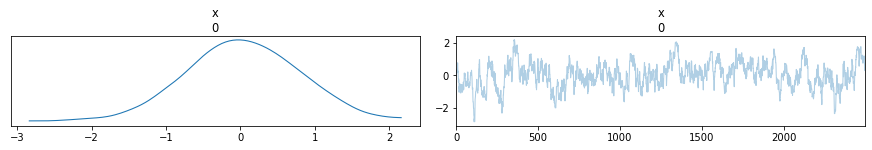

In [151]:
az.plot_trace(dataset)

In [146]:
num_samples = 400
step_size = .9
num_steps_per_sample = 5
params_init = torch.tensor([0.])
tf= HarmonicTrialFunction(torch.ones(1))
n_walkers = 2
init_config = torch.zeros(n_walkers, 1)
results = torch.tensor(hamiltorch.sample(log_prob_func=tf, params_init=params_init,  num_samples=num_samples, step_size=step_size, num_steps_per_sample=num_steps_per_sample))
dataset = az.convert_to_dataset(results.numpy())
print(az.ess(dataset))



Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | #################### | 400/400 | 252.55       
Acceptance Rate 0.90
<xarray.Dataset>
Dimensions:  ()
Data variables:
    x        float64 1.445e+03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a78493c50>,
      dtype=object)

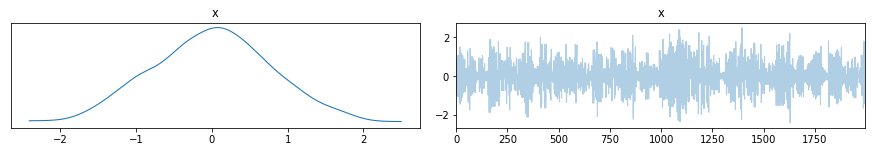

In [147]:
az.plot_trace(dataset)


In [148]:
%timeit metropolis_symmetric(tf, init_config, normal_proposal, num_walkers=n_walkers, num_steps=num_steps)

1.28 s ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [149]:
%timeit hamiltorch.sample(log_prob_func=tf, params_init=params_init,  num_samples=num_samples, step_size=step_size, num_steps_per_sample=num_steps_per_sample)

Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | #################### | 400/400 | 207.20       
Acceptance Rate 0.92
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | #################### | 400/400 | 224.62       
Acceptance Rate 0.94
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | #################### | 400/400 | 243.33       
Acceptance Rate 0.92
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | #################### | 400/400 | 279.71       
Acceptance Rate 0.91
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | ###

In [329]:
f = dim2Rosenbrock(torch.tensor(1/20), torch.tensor(100/20))
n_walkers = 1
init_config = torch.ones(n_walkers, 2)
init_config[0] = 0.
results = metropolis_symmetric(f, init_config, normal_proposal, num_walkers=n_walkers, num_steps=120000)
dataset = az.convert_to_dataset(results.numpy())
print(az.ess(dataset))

<xarray.Dataset>
Dimensions:  (x_dim_0: 2)
Coordinates:
  * x_dim_0  (x_dim_0) int64 0 1
Data variables:
    x        (x_dim_0) float64 228.4 114.1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a6deb4990>,
      dtype=object)

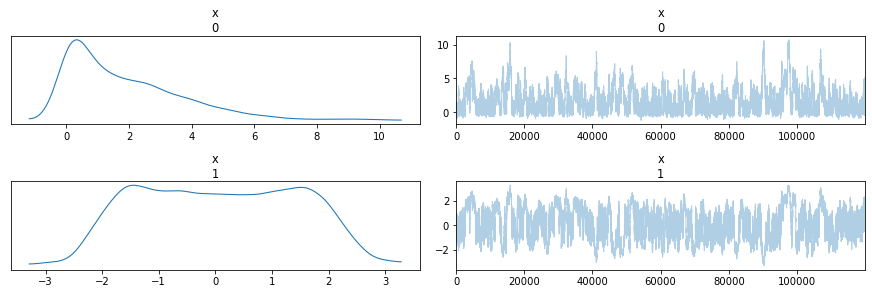

In [330]:
az.plot_trace(dataset)

In [218]:
%timeit metropolis_symmetric(f, init_config, normal_proposal, num_walkers=n_walkers, num_steps=num_steps)

1.35 s ± 288 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [292]:
num_samples = 10000
step_size = .35
num_steps_per_sample = 1
params_init = torch.ones(2)
params_init[0] = 0.f
f = dim2Rosenbrock(torch.tensor(1/20), torch.tensor(100/20))
results = hamiltorch.sample(log_prob_func=f, params_init=params_init,  num_samples=num_samples, step_size=step_size, num_steps_per_sample=num_steps_per_sample)
dataset = az.convert_to_dataset(torch.unsqueeze(torch.stack(results),0).numpy())
print(az.ess(dataset))

Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples     | Samples/sec
0d:00:00:23 | 0d:00:00:00 | #################### | 10000/10000 | 433.39       
Acceptance Rate 0.36
<xarray.Dataset>
Dimensions:  (x_dim_0: 2)
Coordinates:
  * x_dim_0  (x_dim_0) int64 0 1
Data variables:
    x        (x_dim_0) float64 22.43 8.008


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a6baa6c10>,
      dtype=object)

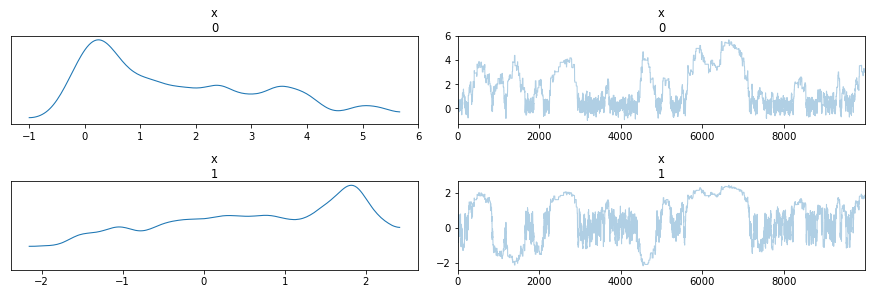

In [293]:
az.plot_trace(dataset)

In [335]:
step_size = 0.2
num_samples = 1200 
L = 60
params_init = torch.ones(2)
params_init[0] = 0.
burn = 200
f = dim2Rosenbrock(torch.tensor(1/20), torch.tensor(100/20))
results = hamiltorch.sample(log_prob_func=f, params_init=params_init, num_samples=num_samples,
                               step_size=step_size, num_steps_per_sample=L,desired_accept_rate=0.75,sampler=hamiltorch.Sampler.HMC_NUTS,burn=burn)
dataset = az.convert_to_dataset(torch.unsqueeze(torch.stack(results),0).numpy())
print(az.ess(dataset))

Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples   | Samples/sec
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Inval

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a732694d0>,
      dtype=object)

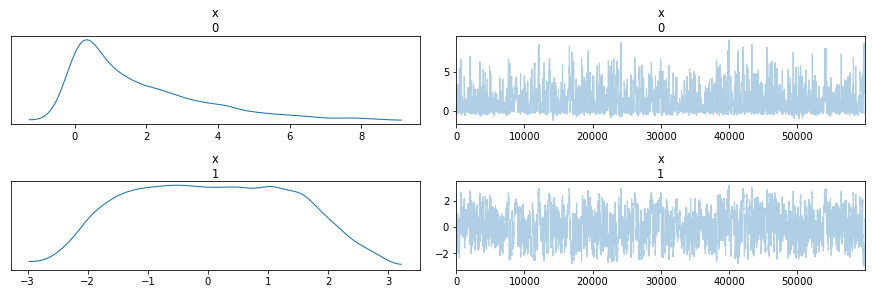

In [336]:
az.plot_trace(dataset)